# 第3章 地理空間分布パターン

Loading required package: sp

Spatial Point Pattern Analysis Code in S-Plus
 
 Version 2 - Spatial and Space-Time analysis



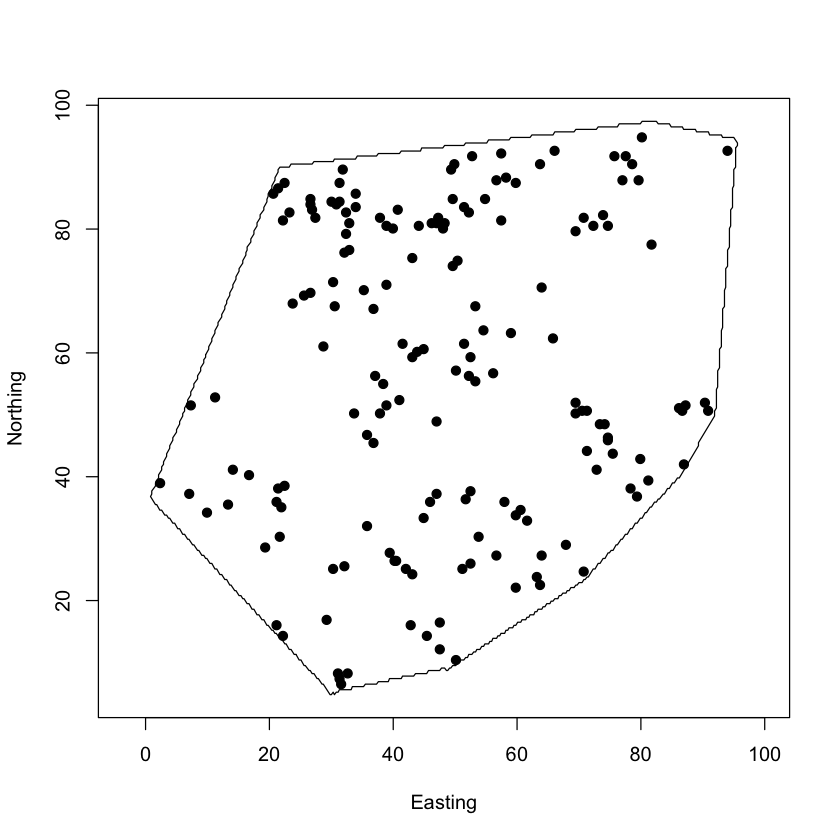

In [1]:
 library(splancs)
 data(cardiff)
 polymap(cardiff$poly, xlab = "Easting", ylab = "Northing")
 points(cardiff$x, cardiff$y, pch = 19)


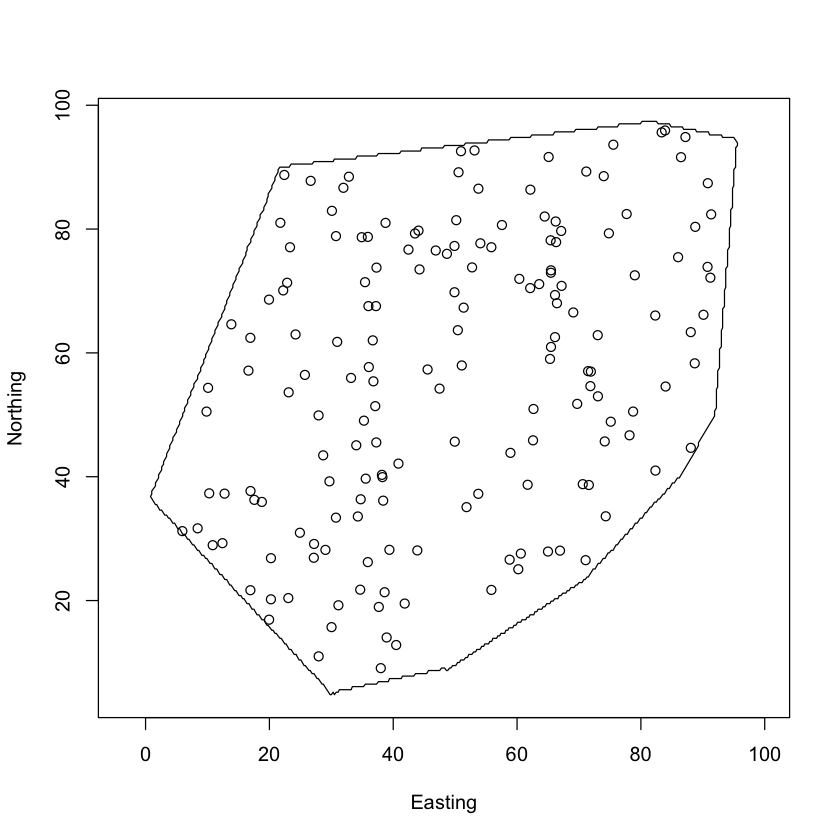

In [2]:
polymap(cardiff$poly, xlab = "Easting", ylab = "Northing")
points(csr(cardiff$poly, length(cardiff$x)), pch = 1)

In [3]:
help(cardiff)

cardiff                package:splancs                 R Documentation

_L_o_c_a_t_i_o_n_s _o_f _h_o_m_e_s _o_f _j_u_v_e_n_i_l_e _o_f_f_e_n_d_e_r_s

_D_e_s_c_r_i_p_t_i_o_n:

     Locations of homes of 168 juvenile offenders on a Cardiff housing
     estate

_U_s_a_g_e:

     data(cardiff)
     
_F_o_r_m_a_t:

     A list corresponding to a Venables and Ripley point object with
     168 observations

       x     numeric  grid eastings                         
       y     numeric  grid northings                        
       area  list     bounding box with xl, xu, yl, yu      
       poly  array    polygon boundary with columns x and y 
      
_S_o_u_r_c_e:

     Herbert, 1980, - Bailey and Gatrell 1995, ch. 3.

_R_e_f_e_r_e_n_c_e_s:

     Bailey, T. C. and Gatrell, A. C. 1995, Interactive spatial data
     analysis. Longman, Harlow.

Doing simulation  1 
Doing simulation  2 
Doing simulation  3 
Doing simulation  4 
Doing simulation  5 
Doing simulation  6 
Doing simulation  7 
Doing simulation  8 
Doing simulation  9 
Doing simulation  10 
Doing simulation  11 
Doing simulation  12 
Doing simulation  13 
Doing simulation  14 
Doing simulation  15 
Doing simulation  16 
Doing simulation  17 
Doing simulation  18 
Doing simulation  19 
Doing simulation  20 
Doing simulation  21 
Doing simulation  22 
Doing simulation  23 
Doing simulation  24 
Doing simulation  25 
Doing simulation  26 
Doing simulation  27 
Doing simulation  28 
Doing simulation  29 
Doing simulation  30 
Doing simulation  31 
Doing simulation  32 
Doing simulation  33 
Doing simulation  34 
Doing simulation  35 
Doing simulation  36 
Doing simulation  37 
Doing simulation  38 
Doing simulation  39 
Doing simulation  40 
Doing simulation  41 
Doing simulation  42 
Doing simulation  43 
Doing simulation  44 
Doing simulation  45 
Doing simulation  4

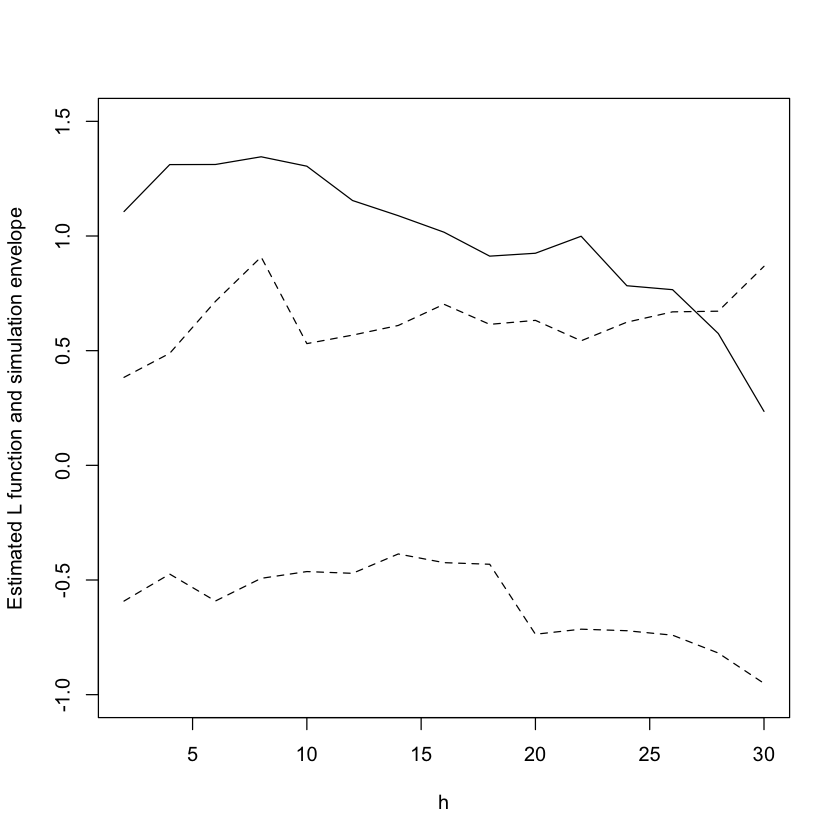

In [4]:
data(cardiff)
s <- seq(2, 30, 2)
UL.khat <- Kenv.csr(length(cardiff$x), cardiff$poly, 
nsim = 99, s = s)
plot(s, sqrt(khat(as.points(cardiff), cardiff$poly, s = s)/pi) - 
s, type = "l", xlab = "h", ylim = c(-1, 1.5), 
ylab = "Estimated L function and simulation envelope")
lines(s, sqrt(UL.khat$upper/pi) - s, lty = 2)
lines(s, sqrt(UL.khat$lower/pi) - s, lty = 2)

Doing labelling  1 / 99 
Doing labelling  2 / 99 
Doing labelling  3 / 99 
Doing labelling  4 / 99 
Doing labelling  5 / 99 
Doing labelling  6 / 99 
Doing labelling  7 / 99 
Doing labelling  8 / 99 
Doing labelling  9 / 99 
Doing labelling  10 / 99 
Doing labelling  11 / 99 
Doing labelling  12 / 99 
Doing labelling  13 / 99 
Doing labelling  14 / 99 
Doing labelling  15 / 99 
Doing labelling  16 / 99 
Doing labelling  17 / 99 
Doing labelling  18 / 99 
Doing labelling  19 / 99 
Doing labelling  20 / 99 
Doing labelling  21 / 99 
Doing labelling  22 / 99 
Doing labelling  23 / 99 
Doing labelling  24 / 99 
Doing labelling  25 / 99 
Doing labelling  26 / 99 
Doing labelling  27 / 99 
Doing labelling  28 / 99 
Doing labelling  29 / 99 
Doing labelling  30 / 99 
Doing labelling  31 / 99 
Doing labelling  32 / 99 
Doing labelling  33 / 99 
Doing labelling  34 / 99 
Doing labelling  35 / 99 
Doing labelling  36 / 99 
Doing labelling  37 / 99 
Doing labelling  38 / 99 
Doing labelling  39 /

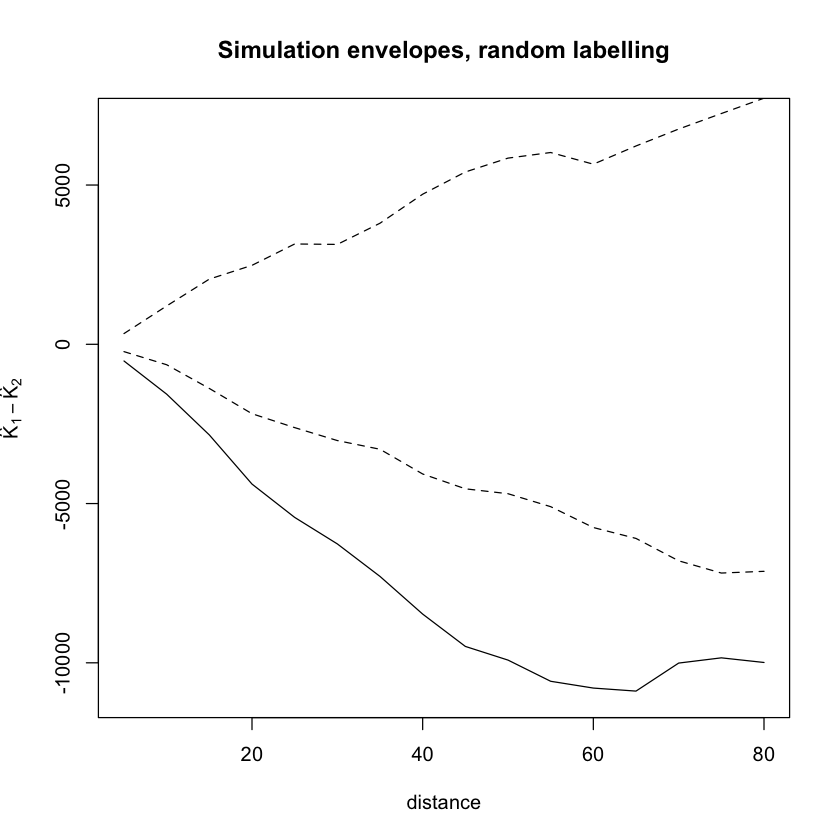

In [5]:
data(okwhite)
data(okblack)
okpoly <- list(x = c(okwhite$x, okblack$x), y = c(okwhite$y, okblack$y))
okpoly.bb <- bboxx(bbox(as.points(okpoly)))
s <- seq(5, 80, 5)
K1.hat <- khat(as.points(okwhite), okpoly.bb, s)
K2.hat <- khat(as.points(okblack), okpoly.bb, s)
K.diff <- K1.hat - K2.hat
plot(s, K.diff, xlab = "distance", ylab = expression(hat(K)[1] - hat(K)[2]), ylim = c(-11000, 7000), type = "l",main = "Simulation envelopes, random labelling")
env.lab <- Kenv.label(as.points(okwhite), as.points(okblack), okpoly.bb, nsim = 99, s = s)
lines(s, env.lab$upper, lty = 2)
lines(s, env.lab$lower, lty = 2)

In [6]:
library(sp)
library(maptools)
pj <- CRS("+proj=longlat +datum=WGS84")
f <- system.file("shapes/sids.shp", package = "maptools")[1]
nc <- readShapePoly(f, IDvar = "FIPSNO", proj4string = pj)

Checking rgeos availability: TRUE

Attaching package: ‘maptools’

The following object is masked from ‘package:sp’:

    nowrapSpatialLines



In [7]:
 library(spdep)
 nc.nb <- poly2nb(nc)

Loading required package: Matrix


In [8]:
nb2listw(nc.nb, style = "B")

Characteristics of weights list object:
Neighbour list object:
Number of regions: 100 
Number of nonzero links: 490 
Percentage nonzero weights: 4.9 
Average number of links: 4.9 

Weights style: B 
Weights constants summary:
    n    nn  S0  S1    S2
B 100 10000 490 980 10696

In [9]:
nc.c <- coordinates(nc)
nc.tri.nb <- tri2nb(nc.c)


     PLEASE NOTE:  The components "delsgs" and "summary" of the
 object returned by deldir() are now DATA FRAMES rather than
 matrices (as they were prior to release 0.0-18).
 See help("deldir").
 
     PLEASE NOTE: The process that deldir() uses for determining
 duplicated points has changed from that used in version
 0.0-9 of this package (and previously). See help("deldir").




In [10]:
nc.knn.nb <- knn2nb(knearneigh(nc.c, k = 3))

In [11]:
nc.dn.nb <- dnearneigh(nc.c, d1 = 0, d2 = 40, longlat = TRUE)

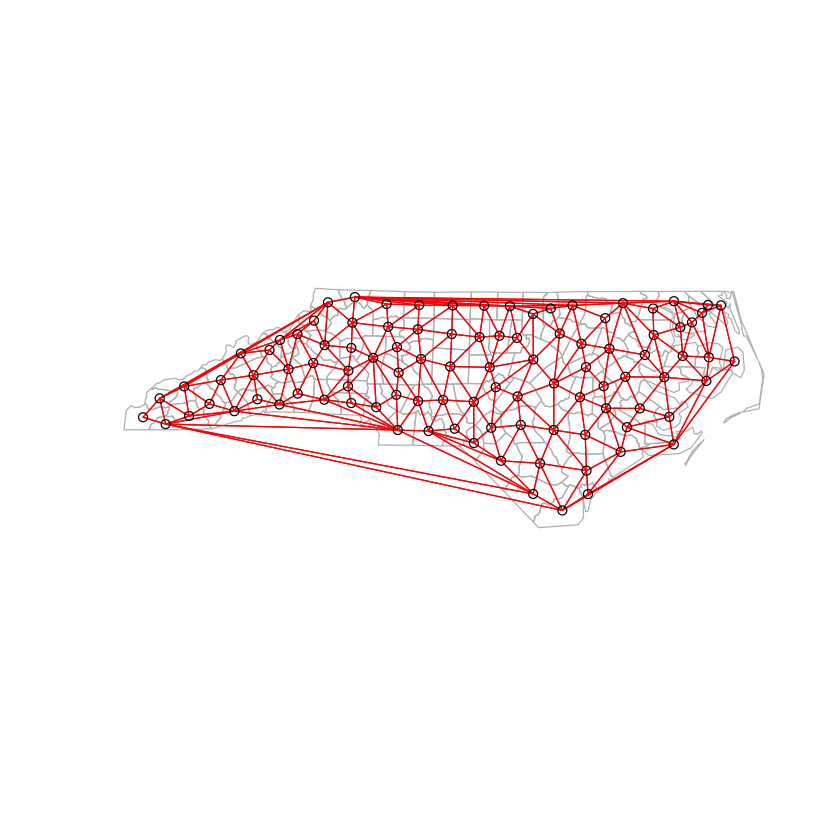

In [12]:
plot(nc, border = "grey")
plot(nc.tri.nb, nc.c, col = "red", add = TRUE)

ERROR: Error in file(con, "rb"):  コネクションを開くことができません 


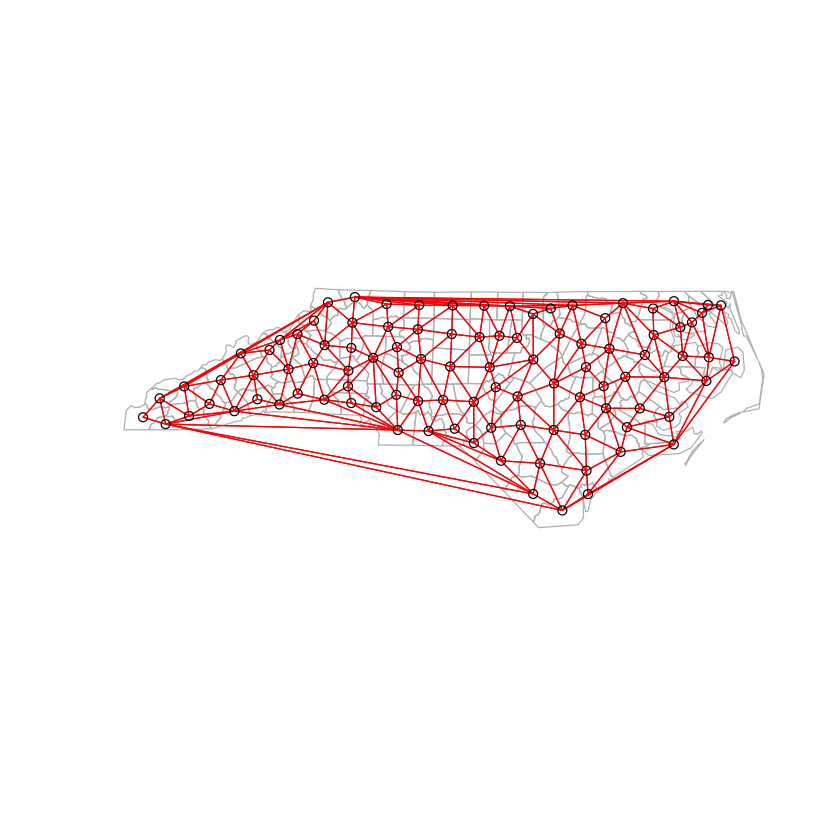

In [13]:
plot(nc, border = "grey")
plot(nc.tri.nb, nc.c, col = "red", add = TRUE)

ERROR: Error in file(con, "rb"):  コネクションを開くことができません 


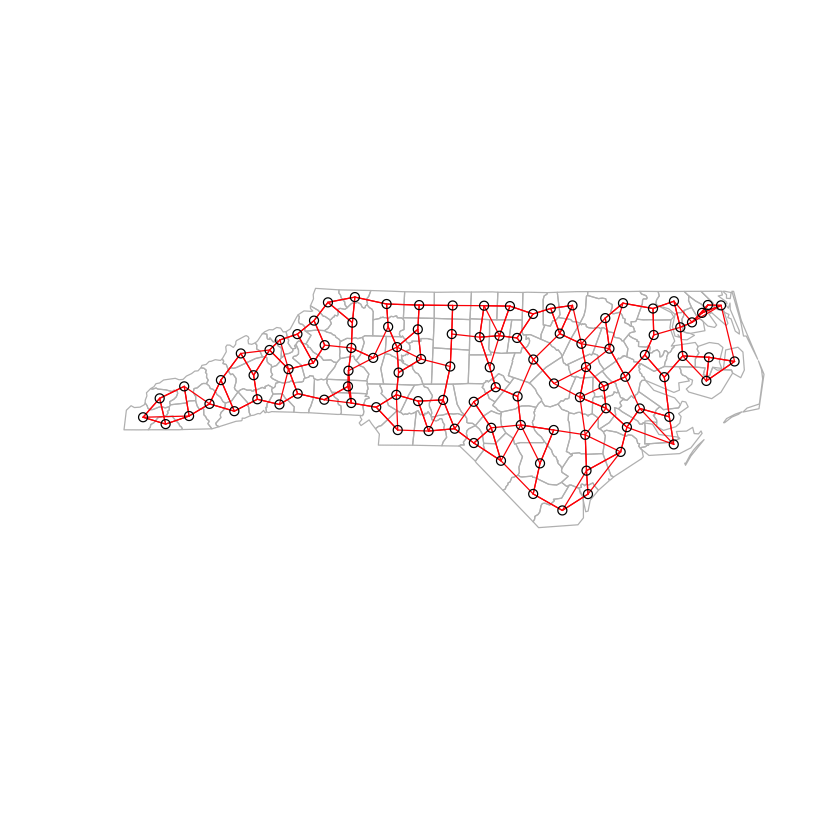

In [14]:
plot(nc, border = "grey")
plot(nc.knn.nb, nc.c, col = "red", add = TRUE)

ERROR: Error in file(con, "rb"):  コネクションを開くことができません 


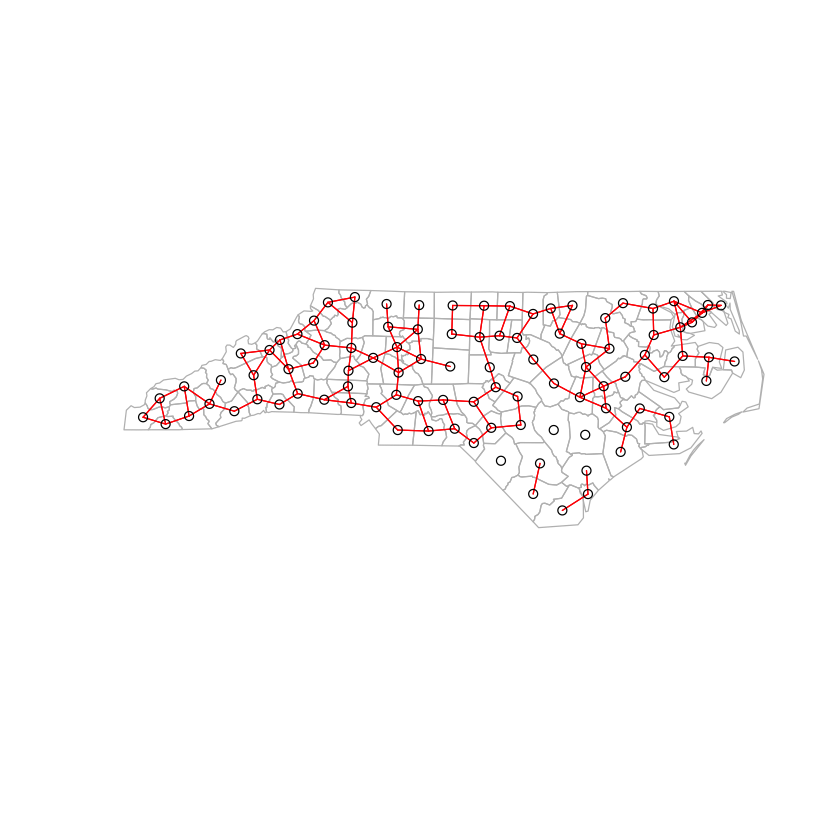

In [15]:
plot(nc, border = "grey")
 plot(nc.dn.nb, nc.c, col = "red", add = TRUE)

In [16]:
diffs <- diffnb(nc.nb, nc.knn.nb)

Warning message:
In diffnb(nc.nb, nc.knn.nb): region.id differ; using ids of first list

ERROR: Error in file(con, "rb"):  コネクションを開くことができません 


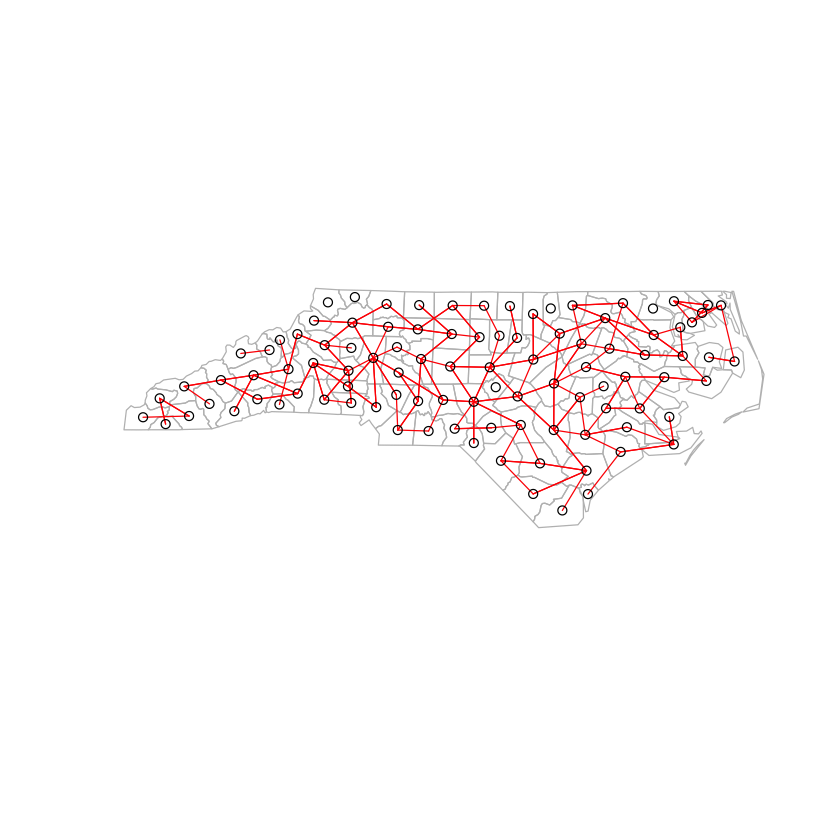

In [17]:
plot(nc, border = "grey")
plot(diffs, nc.c, col = "red", add = TRUE)

In [18]:
s <- nc@data$SID74/nc@data$BIR74 * 1e+05
moran.test(s, nb2listw(nc.knn.nb))


	Moran I test under randomisation

data:  s  
weights: nb2listw(nc.knn.nb)  

Moran I statistic standard deviate = 3.0285, p-value = 0.001229
alternative hypothesis: greater
sample estimates:
Moran I statistic       Expectation          Variance 
      0.217763140      -0.010101010       0.005660983 


In [19]:
 geary.test(s, nb2listw(nc.nb, style = "B"))


	Geary C test under randomisation

data:  s 
weights: nb2listw(nc.nb, style = "B") 

Geary C statistic standard deviate = 3.0989, p-value = 0.0009711
alternative hypothesis: Expectation greater than statistic
sample estimates:
Geary C statistic       Expectation          Variance 
       0.67796679        1.00000000        0.01079878 


In [20]:
lmo <- localmoran(s, nb2listw(nc.nb, style = "B"))
head(lmo)

,Ii,E.Ii,Var.Ii,Z.Ii,Pr(z > 0)
37001,-0.38296680,-0.06060606,5.66778683,-0.13540522,0.55385425
37003,2.84892433,-0.04040404,3.77639636,1.48681905,0.06853130
37005,1.98692859,-0.03030303,2.83039504,1.19903605,0.11525696
37007,-3.68378017,-0.04040404,3.77639636,-1.87484437,0.96959293
37009,1.89322430,-0.03030303,2.83039504,1.14333852,0.12644903
37011,3.20602844,-0.05050505,4.72219363,1.49859284,0.06698965


ERROR: Error in file(con, "rb"):  コネクションを開くことができません 


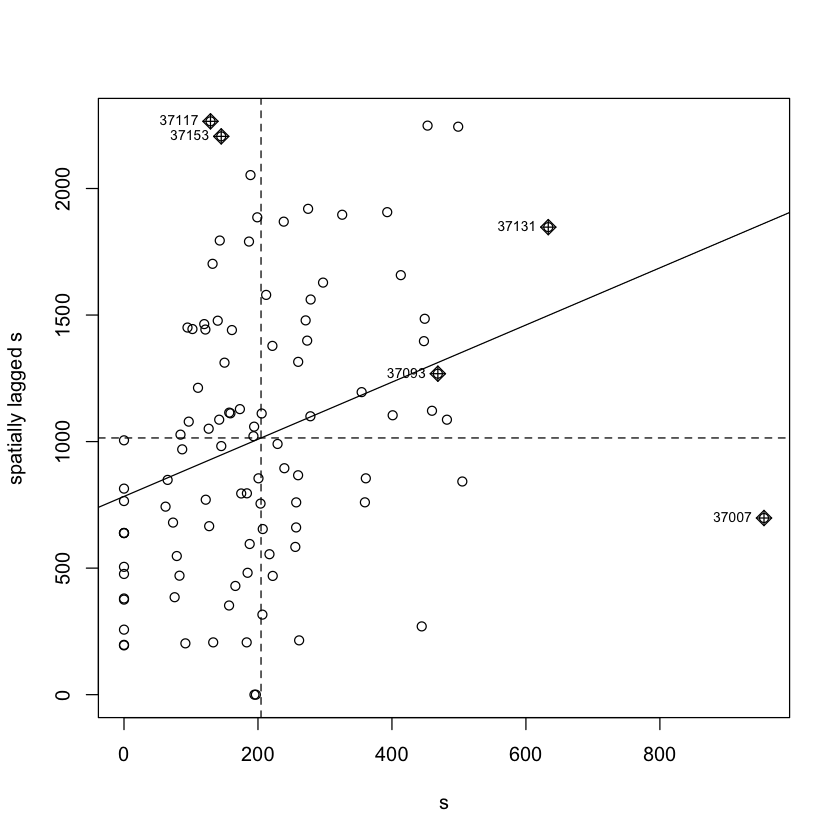

In [21]:
 moran.plot(s, nb2listw(nc.nb, style = "B"))

In [22]:
 library(DCluster)

Loading required package: boot
Loading required package: MASS


In [23]:
Observed <- nc@data$SID74
Expected <- nc@data$BIR74 * sum(nc@data$SID74)/sum(nc@data$BIR74)
Population <- nc@data$BIR74
dat <- data.frame(Observed, Expected, Population)
summary(dat)

    Observed        Expected         Population   
 Min.   : 0.00   Min.   : 0.5013   Min.   :  248  
 1st Qu.: 2.00   1st Qu.: 2.1771   1st Qu.: 1077  
 Median : 4.00   Median : 4.4078   Median : 2180  
 Mean   : 6.67   Mean   : 6.6700   Mean   : 3300  
 3rd Qu.: 8.25   3rd Qu.: 7.9564   3rd Qu.: 3936  
 Max.   :44.00   Max.   :43.6390   Max.   :21588  

In [24]:
xy <- coordinates(nc)
d <- spDistsN1(xy, xy[1, ], longlat = TRUE)
i <- order(d)

In [25]:
 kullnagar.stat(dat[i, ], fractpop = 0.5)

value     size 
1.836693 1.000000

In [26]:
xy1 <- as.data.frame(xy)
names(xy1) <- c("x", "y")
kn.p <- opgam(cbind(dat, xy1), thegrid = xy1, alpha = 0.02, iscluster = kn.iscluster, fractpop = 0.15, R = 999, 
model = "poisson", mle = calculate.mle(dat, model = "poisson"))
kn.p

,x,y,statistic,cluster,pvalue,size
37007,-80.10407,34.9752,106625.2,1,0.001,1
37013,-76.83809,35.58468,8869.925,1,0.001,24
37015,-76.98481,36.0619,28388.07,1,0.001,27
37017,-78.56013,34.60932,333.1234,1,0.002,2
37019,-78.25073,34.07663,1782.277,1,0.001,9
37029,-76.23435,36.4012,7360.441,1,0.001,27
37041,-76.61648,36.14893,7360.441,1,0.001,27
37047,-78.65492,34.26323,51695.41,1,0.001,4
37049,-77.17801,35.23062,236.7854,1,0.004,16
37053,-76.05211,36.39714,7360.441,1,0.001,27


In [27]:
x.glm <- glm(Observed ~ 1 + offset(log(Expected)), data = dat, 
 family = "poisson")
x.nb <- glm.nb(Observed ~ 1 + offset(log(Expected)), 
 data = dat)
test.nb.pois(x.nb, x.glm)


	Likelihood ratio test for overdispersion

data:  x.nb : x.glm
LR = 36.421, = 1, p-value = 1.589e-09
sample estimates:
       zscore  p.mayor.modZ 
-6.033594e+00  1.603523e-09 


In [28]:
kn.nb <- opgam(cbind(dat, xy1), thegrid = xy1, alpha = 0.02, 
iscluster = kn.iscluster, fractpop = 0.15, R = 999, 
model = "negbin", mle = calculate.mle(dat, model = "negbin"))

In [29]:
class(kn.nb)

[1] "data.frame"

In [30]:
coordinates(kn.nb) <- ~x + y
class(kn.nb)

[1] "SpatialPointsDataFrame"
attr(,"package")
[1] "sp"

In [31]:
 k <- which.min(kn.nb$pvalue)
 k

[1] 3

In [32]:
x = c(0.5, 0.5, 1.0, 1.5)
y = c(1.5, 0.5, 0.5, 0.5)
xy = cbind(x,y)
dimnames(xy)[[1]] = c("a", "b", "c", "d")
pts = SpatialPoints(xy)
xpol = c(0,1,1,0,0)
ypol = c(0,0,1,1,0)
pol = SpatialPolygons(list(
 Polygons(list(Polygon(cbind(xpol-1.05,ypol))), ID="x1"),
 Polygons(list(Polygon(cbind(xpol,ypol))), ID="x2"),
 Polygons(list(Polygon(cbind(xpol,ypol - 1.0))), ID="x3"), Polygons(list(Polygon(cbind(xpol + 1.0, ypol))), ID="x4"),Polygons(list(Polygon(cbind(xpol+.4, ypol+.1))), ID="x5")))

In [33]:
j <- over(kn.nb[k, ], nc)
j

ERROR: Error: identicalCRS(x, y) is not TRUE


ERROR: Error in eval(expr, envir, enclos):  オブジェクト 'j' がありません 


In [34]:
nc

An object of class "SpatialPolygonsDataFrame"
Slot "data":
       AREA PERIMETER CNTY_ CNTY_ID         NAME  FIPS FIPSNO CRESS_ID BIR74
37001 0.111     1.392  1904    1904     Alamance 37001  37001        1  4672
37003 0.066     1.070  1950    1950    Alexander 37003  37003        2  1333
37005 0.061     1.231  1827    1827    Alleghany 37005  37005        3   487
37007 0.138     1.621  2096    2096        Anson 37007  37007        4  1570
37009 0.114     1.442  1825    1825         Ashe 37009  37009        5  1091
37011 0.064     1.213  1892    1892        Avery 37011  37011        6   781
37013 0.203     3.197  2004    2004     Beaufort 37013  37013        7  2692
37015 0.180     2.151  1905    1905       Bertie 37015  37015        8  1324
37017 0.225     2.107  2162    2162       Bladen 37017  37017        9  1782
37019 0.212     2.024  2241    2241    Brunswick 37019  37019       10  2181
37021 0.168     1.995  1988    1988     Buncombe 37021  37021       11  7515
37023 0.134     1

In [68]:
xy = cbind(kn.nb[k, ]["x"], kn.nb[k, ]["y"])

In [70]:
pts = SpatialPoints(xy)

In [80]:
kn.nb[k, ]

,x,y,statistic,cluster,pvalue,size
37117,-77.10766,35.83635,-77.10766,35.83635,-77.10766,35.83635


In [82]:
class(pts)

[1] "SpatialPoints"
attr(,"package")
[1] "sp"

In [77]:
class(nc)

[1] "SpatialPolygonsDataFrame"
attr(,"package")
[1] "sp"

In [33]:
nc@data$NAME[j]

ERROR: Error in NextMethod("["):  オブジェクト 'j' がありません 


ERROR: Error in inherits(pt, "SpatialPoints"):  オブジェクト 'j' がありません 


ERROR: Error in file(con, "rb"):  コネクションを開くことができません 


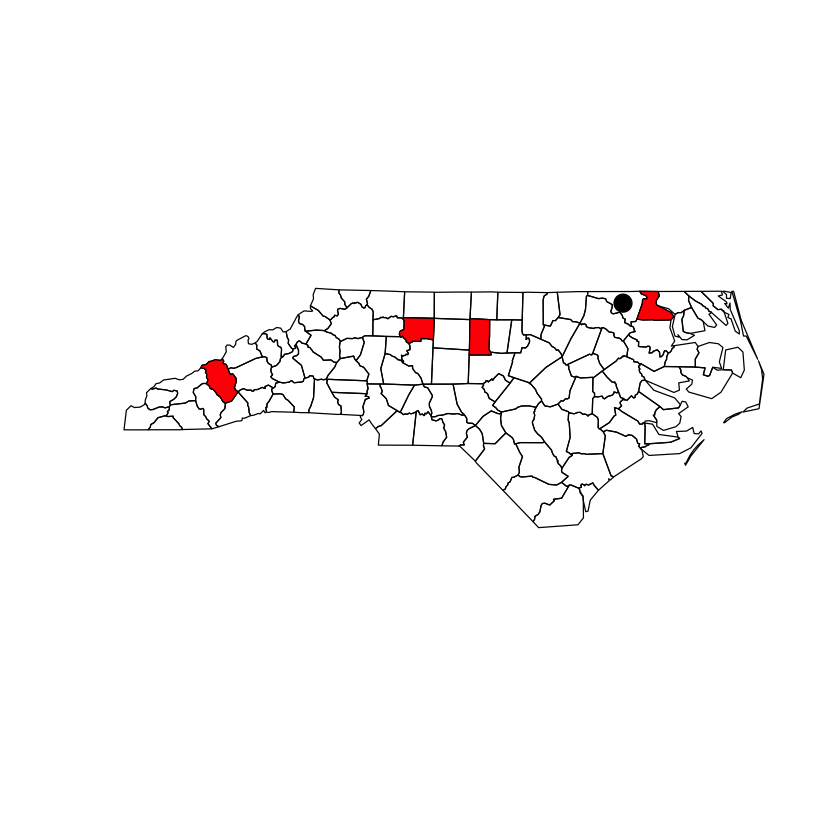

In [34]:
 i <- rank(spDistsN1(xy, xy[j, ], longlat = TRUE))
 plot(nc)
 plot(nc[i < kn.nb$size[k], ], col = "red", add = TRUE)
 plot(kn.nb[k, ], pch = 19, cex = 2, add = TRUE)

In [35]:
 v <- kn.nb$pvalue
 v[which.min(v)] <- NA
 k <- which.min(v)
 k

[1] 4

In [36]:
 j <- overlay(kn.nb[k, ], nc)
 nc@data$NAME[j]

ERROR: Error in (function (classes, fdef, mtable) : unable to find an inherited method for function ‘overlay’ for signature ‘"SpatialPointsDataFrame"’


ERROR: Error in NextMethod("["):  オブジェクト 'j' がありません 


ERROR: Error in inherits(pt, "SpatialPoints"):  オブジェクト 'j' がありません 


ERROR: Error in file(con, "rb"):  コネクションを開くことができません 


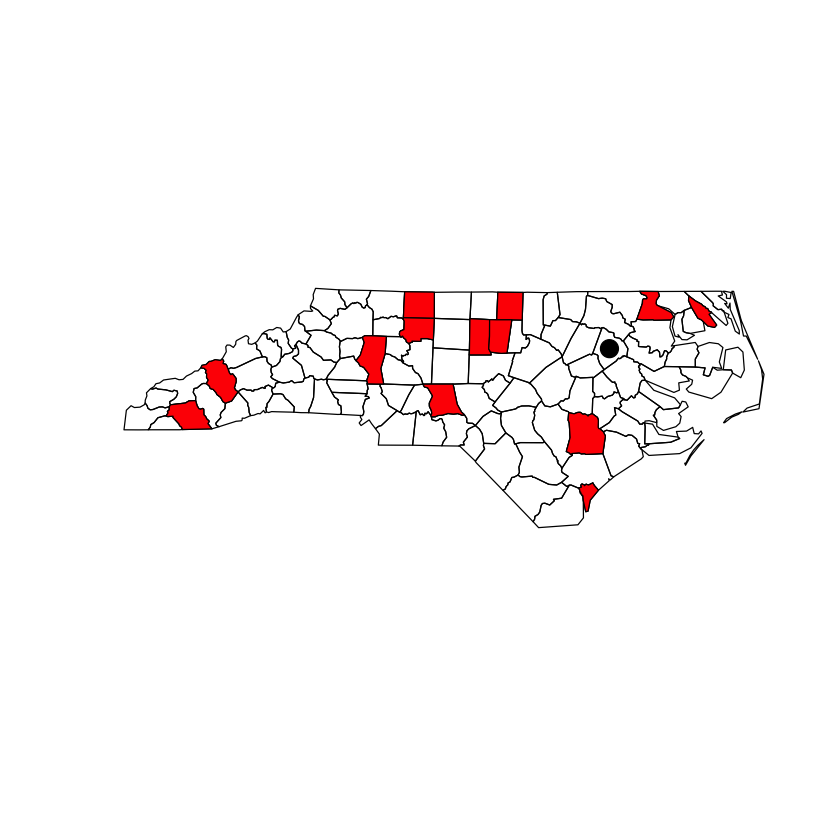

In [37]:
 i <- rank(spDistsN1(xy, xy[j, ], longlat = TRUE))
 plot(nc)
 plot(nc[i < kn.nb$size[k], ], col = "red", add = TRUE)
 plot(kn.nb[k, ], pch = 19, cex = 2, add = TRUE)

In [46]:
kn.nb

                coordinates  statistic cluster pvalue size
37015  (-76.98481, 36.0619)  28388.070       1  0.019   27
37053 (-76.05211, 36.39714)   7360.441       1  0.018   27
37065 (-77.59819, 35.90722) 144050.649       1  0.017   14
37091 (-76.99478, 36.36145)  26739.675       1  0.016    9
37131 (-77.41056, 36.42228) 197884.647       1  0.012    5
37187 (-76.58298, 35.82505)  22824.250       1  0.014   26

In [35]:
 j <- over(kn.nb, nc)

ERROR: Error: identicalCRS(x, y) is not TRUE


In [39]:
 find.row <- function(j, s) {
     i <- rank(spDistsN1(xy, xy[j, ], longlat = TRUE))
     return(i < s)
 }

In [40]:
 clst <- mapply(find.row, j, as(kn.nb, "data.frame")[, 6])
 clst2 <- as.logical(rowSums(clst))

ERROR: Error in mapply(find.row, j, as(kn.nb, "data.frame")[, 6]):  オブジェクト 'j' がありません 


ERROR: Error in rowSums(clst):  オブジェクト 'clst' がありません 


ERROR: Error in eval(expr, envir, enclos):  オブジェクト 'clst2' がありません 


ERROR: Error in cols[clst2] <- "red":  オブジェクト 'cols' がありません 


ERROR: Error in plot.SpatialPolygons(x, ...):  オブジェクト 'cols' がありません 


ERROR: Error in file(con, "rb"):  コネクションを開くことができません 


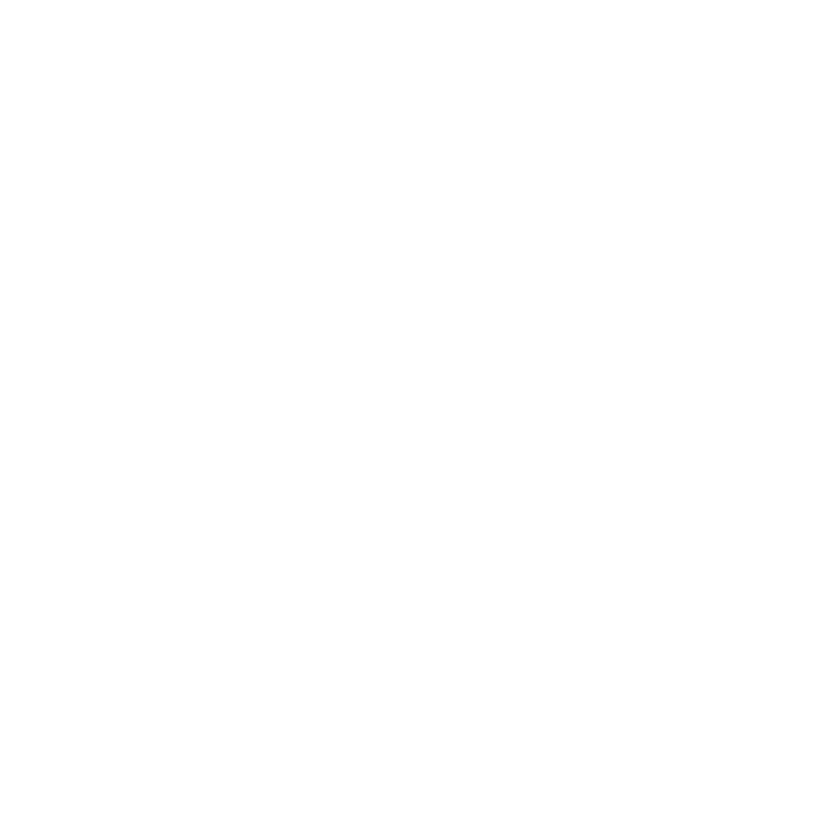

In [41]:
 cols <- rep("white", length(clst2))
 cols[clst2] <- "red"
 plot(nc, col = cols)

In [42]:
##==============================================================
 p1 <- kn.nb[order(kn.nb@data$pvalue), ]
 plot(p1, pch = 19, col = "white", cex = 1.8, add = TRUE)
 plot(p1, pch = as.character(1:nrow(p1)), add = TRUE)
##==============================================================
 library(splancs)
 data(southlancs)
##==============================================================
 d <- dsquare(southlancs.pts, old.incinerator)
##==============================================================
 larynx <- sum(southlancs.cc)
 lung <- length(southlancs.cc) - larynx
 r <- larynx/lung
##==============================================================
 result <- tribble(ccflag = southlancs.cc, vars = d, alphas = 10, 
     betas = 10, rho = r)
##==============================================================
 print.ribfit(result)
##==============================================================
 library(DCluster)
 dat2 <- cbind(dat, xy1)
 i <- which(as(nc, "data.frame")["NAME"] == "Robeson")
 stone.stat(dat2, region = i, lambda = 1)
##==============================================================
 stone.test(Observed ~ offset(log(Expected)), data = dat2, 
     model = "poisson", R = 99, region = i, lambda = 1)

ERROR: Error in plot.xy(xy.coords(x, y), type = type, ...): plot.new has not been called yet


ERROR: Error in plot.xy(xy.coords(x, y), type = type, ...): plot.new has not been called yet



Spatial Point Pattern Analysis Code in S-Plus
 
 Version 2 - Spatial and Space-Time analysis



[1] 3
Call:
tribble(ccflag = southlancs.cc, vars = d, alphas = 10, betas = 10, 
    rho = r)
Kcode = 2

Distance decay parameters:
        Alpha      Beta
[1,] 53.60319 3.724e-06

rho parameter : 0.0584454548176267

     log-likelihood : -211.514500683159
null log-likelihood : -217.085135422081

        D = 2(L-Lo) : 11.1412694778443


region 
2.003457 2.000000

Stone's Test for raised incidence around locations 

	Type of boots.: parametric 
	Model used when sampling: Poisson 
	Number of simulations: 99 
	Statistic:  2.003457 
	p-value :  0.01 